In [10]:
#Importing Libraries

#import Client ID and Client Secret ID from config.py
from config import cid, secret

#Importing dependencies (pandas, json, requests, numpy, matplotlib)
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

#Spotipy APU for Spotify (to pull data)
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)

In [2]:
# Define lists to add to csv
artist_name = []
track_name = []
popularity = []
track_id = []
audio_features = []

# Loop through the 1000 most popular songs associated with the year 2023
for i in range(0,1000,50):
    track_results = sp.search(q='year:2023', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        audio_features.append(sp.audio_features(t['id']))

In [3]:
# Make a dataframe with the track name, artist name, track id, and popularity of the track
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'popularity' : popularity})
print(track_df.shape)
track_df.head()

# Make a dataframe with the trackID and the audio features of each track
features_df = pd.DataFrame({'AudioFeatures' : audio_features})
features_df = features_df['AudioFeatures'].str[0].apply(pd.Series)

# Save both the dataframes to csv files
track_df.to_csv('track_df.csv')
features_df.to_csv('features_df.csv')

features_df.head()

(1000, 4)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.847,0.6220,1,-6.747,0,0.0903,0.119,0.000000,0.285,0.220,130.001,audio_features,4rXLjWdF2ZZpXCVTfWcshS,spotify:track:4rXLjWdF2ZZpXCVTfWcshS,https://api.spotify.com/v1/tracks/4rXLjWdF2ZZp...,https://api.spotify.com/v1/audio-analysis/4rXL...,125040,4
1,0.511,0.5320,5,-5.745,1,0.0560,0.169,0.000000,0.311,0.322,137.827,audio_features,3k79jB4aGmMDUQzEwa46Rz,spotify:track:3k79jB4aGmMDUQzEwa46Rz,https://api.spotify.com/v1/tracks/3k79jB4aGmMD...,https://api.spotify.com/v1/audio-analysis/3k79...,219724,4
2,0.712,0.6030,8,-5.520,1,0.0262,0.186,0.000000,0.115,0.670,97.994,audio_features,1Lo0QY9cvc8sUB2vnIOxDT,spotify:track:1Lo0QY9cvc8sUB2vnIOxDT,https://api.spotify.com/v1/tracks/1Lo0QY9cvc8s...,https://api.spotify.com/v1/audio-analysis/1Lo0...,265493,4
3,0.444,0.0911,0,-17.665,1,0.0307,0.959,0.000001,0.098,0.142,78.403,audio_features,6wf7Yu7cxBSPrRlWeSeK0Q,spotify:track:6wf7Yu7cxBSPrRlWeSeK0Q,https://api.spotify.com/v1/tracks/6wf7Yu7cxBSP...,https://api.spotify.com/v1/audio-analysis/6wf7...,222370,4
4,0.770,0.5800,0,-8.393,1,0.2470,0.519,0.000127,0.233,0.753,144.072,audio_features,741UUVE2kuITl0c6zuqqbO,spotify:track:741UUVE2kuITl0c6zuqqbO,https://api.spotify.com/v1/tracks/741UUVE2kuIT...,https://api.spotify.com/v1/audio-analysis/741U...,109750,4


**Work from CSV data**

In [4]:
# Import CSVs
# Tracks
csv_path = "track_df.csv"
track_df = pd.read_csv(csv_path)
track_df.head()

# Audio features
csv_path = "features_df.csv"
audio_features_df = pd.read_csv(csv_path)
audio_features_df.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.847,0.6220,1,-6.747,0,0.0903,0.119,0.000000,0.285,0.220,130.001,audio_features,4rXLjWdF2ZZpXCVTfWcshS,spotify:track:4rXLjWdF2ZZpXCVTfWcshS,https://api.spotify.com/v1/tracks/4rXLjWdF2ZZp...,https://api.spotify.com/v1/audio-analysis/4rXL...,125040,4
1,1,0.511,0.5320,5,-5.745,1,0.0560,0.169,0.000000,0.311,0.322,137.827,audio_features,3k79jB4aGmMDUQzEwa46Rz,spotify:track:3k79jB4aGmMDUQzEwa46Rz,https://api.spotify.com/v1/tracks/3k79jB4aGmMD...,https://api.spotify.com/v1/audio-analysis/3k79...,219724,4
2,2,0.712,0.6030,8,-5.520,1,0.0262,0.186,0.000000,0.115,0.670,97.994,audio_features,1Lo0QY9cvc8sUB2vnIOxDT,spotify:track:1Lo0QY9cvc8sUB2vnIOxDT,https://api.spotify.com/v1/tracks/1Lo0QY9cvc8s...,https://api.spotify.com/v1/audio-analysis/1Lo0...,265493,4
3,3,0.444,0.0911,0,-17.665,1,0.0307,0.959,0.000001,0.098,0.142,78.403,audio_features,6wf7Yu7cxBSPrRlWeSeK0Q,spotify:track:6wf7Yu7cxBSPrRlWeSeK0Q,https://api.spotify.com/v1/tracks/6wf7Yu7cxBSP...,https://api.spotify.com/v1/audio-analysis/6wf7...,222370,4
4,4,0.770,0.5800,0,-8.393,1,0.2470,0.519,0.000127,0.233,0.753,144.072,audio_features,741UUVE2kuITl0c6zuqqbO,spotify:track:741UUVE2kuITl0c6zuqqbO,https://api.spotify.com/v1/tracks/741UUVE2kuIT...,https://api.spotify.com/v1/audio-analysis/741U...,109750,4


In [5]:
#Merge the two dataframes together
merged_df = pd.merge(track_df, audio_features_df, left_on="track_id", right_on="id", how="inner")

#remove original index columns, as well as columns containing information that isn't useful for our analysis/visualizations
merged_df = merged_df.drop(columns=["Unnamed: 0_x", "Unnamed: 0_y", "type", "mode", "uri", "track_href", "analysis_url", "id"])
merged_df 

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Gunna,fukumean,4rXLjWdF2ZZpXCVTfWcshS,96,0.847,0.6220,1,-6.747,0.0903,0.1190,0.000000,0.2850,0.220,130.001,125040,4
1,Olivia Rodrigo,vampire,3k79jB4aGmMDUQzEwa46Rz,98,0.511,0.5320,5,-5.745,0.0560,0.1690,0.000000,0.3110,0.322,137.827,219724,4
2,Luke Combs,Fast Car,1Lo0QY9cvc8sUB2vnIOxDT,91,0.712,0.6030,8,-5.520,0.0262,0.1860,0.000000,0.1150,0.670,97.994,265493,4
3,Billie Eilish,What Was I Made For? [From The Motion Picture ...,6wf7Yu7cxBSPrRlWeSeK0Q,97,0.444,0.0911,0,-17.665,0.0307,0.9590,0.000001,0.0980,0.142,78.403,222370,4
4,Nicki Minaj,Barbie World (with Aqua) [From Barbie The Album],741UUVE2kuITl0c6zuqqbO,95,0.770,0.5800,0,-8.393,0.2470,0.5190,0.000127,0.2330,0.753,144.072,109750,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ed Sheeran,Shivers,4OB4e794sXCtF1ePc0CGyf,0,0.788,0.8590,2,-2.724,0.0856,0.2810,0.000000,0.0424,0.822,141.020,207853,4
996,Ed Sheeran,Celestial,2iw3AyLoR2rBewzlrFnpAm,4,0.574,0.8520,2,-1.248,0.0397,0.0529,0.000000,0.1610,0.501,123.038,209027,4
997,Ed Sheeran,Shivers,2kBkGFDSEx0w49BlOXOc47,0,0.788,0.8590,2,-2.724,0.0856,0.2810,0.000000,0.0424,0.822,141.020,207853,4
998,Ed Sheeran,Bad Habits,6vOpodBZEr0RMk11NMdkpo,0,0.807,0.8930,11,-3.745,0.0347,0.0451,0.000028,0.3660,0.537,126.011,230747,4


In [15]:
# Create a function that allows us to create a scatter plot with any two of the columns in the data frame
# It also creates a linear regression line and calculates the r value
# The function takes in the x and y values as well as making the title of the graph equal to the column names with "vs." in between

def music_plot(x_values, y_values):
    # Generate scatter plot using matplotlib (plt.scatter)
    plt.scatter(x_values, y_values, marker="o", facecolors="skyblue", edgecolors="black")

    # Generate the titles and labels for the graph, capitalize the first letter of each word
    plt.title(f"{x_values.name.capitalize()} vs. {y_values.name.capitalize()}")
    plt.xlabel(x_values.name.capitalize())
    plt.ylabel(y_values.name.capitalize())

    # Add a grid to the graph
    plt.grid()

    # Calculate the linear regression line
    x_values = x_values.astype('float')
    y_values = y_values.astype('float')
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")

    # Plot and annotate the linear regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

    # Show the figure
    plt.show()

The r-value is: -0.04720332375329639


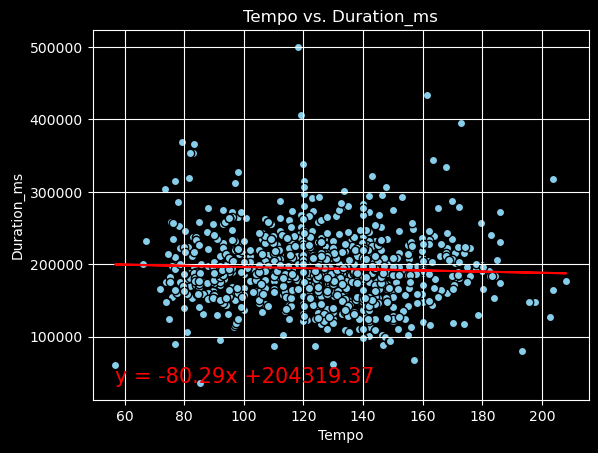

In [37]:
# Test the function music_plot()
music_plot(merged_df['tempo'], merged_df['duration_ms'])

The r-value is: 0.12396969548812445


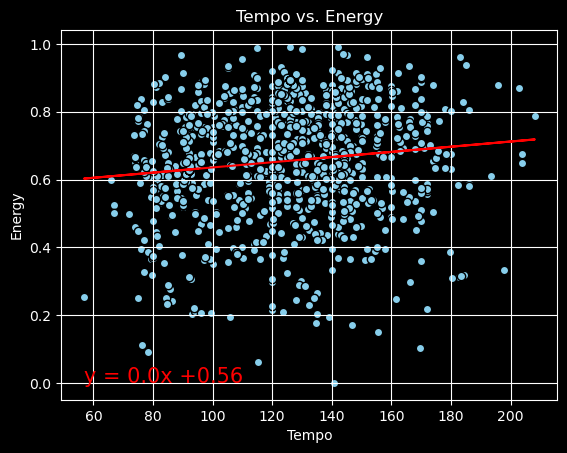

In [35]:
# Test the function music_plot()
music_plot(merged_df['tempo'], merged_df['energy'])

In [20]:
# Create a new dataframe using merged_df called artist_counts_df, 
# The first column should be unique artist names from merged_df["artist_name"]
# Group by artist and count the number of songs in the merged_df for the artist in a second column called "track_count"
# The third column should be a column called "tracks" of dictionaries with the following format {track_1 name:track_1 id}, based on merged_df["track_name"] and merged_df["track_id"]

# Create dataframe
artist_counts_df = pd.DataFrame()

# Add columns
# Artist name from merged_df["artist_name"]
artist_counts_df["artist_name"] = merged_df["artist_name"].unique()
# Track count from merged_df grouped by artist
artist_counts_df["track_count"] = merged_df.groupby("artist_name").count()["track_id"].values
# Tracks and track ids stored in a dictionary
artist_counts_df["tracks"] = merged_df.groupby("artist_name").apply(lambda x: dict(zip(x["track_name"], x["track_id"]))).values

# Order by track_count descending
artist_counts_df = artist_counts_df.sort_values("track_count", ascending=False)

# Display sample data from artist_counts_df
artist_counts_df.head()

,artist_name,track_count,tracks
250,6YNTHMANE,87,"{'Chemical': '0Jd8HeZ7wQj5yFiv8uOn8Z', 'Enough..."
99,DaBaby,45,"{'Classy 101': '5MbGunkWBcgz4TmTKPjYBE', 'Niña..."
212,Lil Tjay,37,"{'Last Night': '7K3BhSpAxZBznislvUMVtn', 'Thin..."
206,$uicideboy$,34,{'Calling (Spider-Man: Across the Spider-Verse...
179,Lewis Capaldi,32,"{'Flooded The Face': '4daEMLSZCgZ2Mt7gNm2SRa',..."


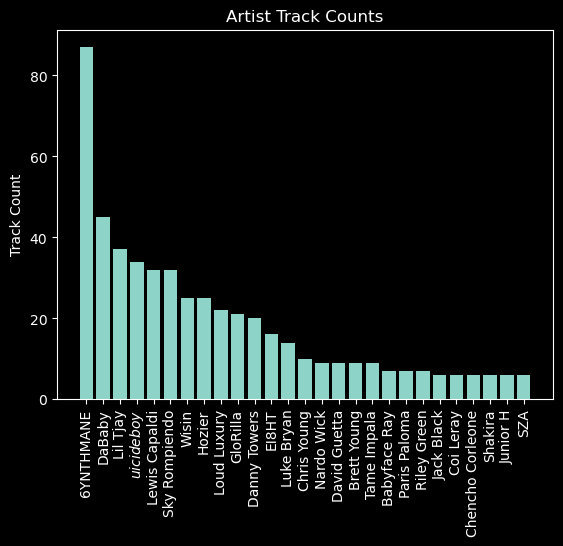

In [24]:
# Create a bar chart of the data in the artist_counts_df dataframe, plotting all artists where artist_counts_df['track_count'] is greater than 5.
# Create the bar chart using the matplotlib.pyplot.bar() function.
# Use the artist_counts_df['artist_name'] column for the x-axis labels.
# Use the artist_counts_df['track_count'] column for the y-axis values.
# Use the artist_counts_df['artist_name'] column for the tick labels.
# Use the plt.xticks() function to rotate the tick labels 90 degrees.
# Use the plt.ylabel() function to add the y-axis label.
# Use the plt.title() function to add the chart title.
# Use the plt.show() function to display the chart.

filtered_df = artist_counts_df[artist_counts_df['track_count'] > 5]

# Create the bar chart using the filtered dataframe
plt.bar(filtered_df['artist_name'], filtered_df['track_count'])

# Set the x-axis tick labels to the artist names and rotate them 90 degrees
plt.xticks(filtered_df['artist_name'], rotation=90)

# Add the y-axis label
plt.ylabel('Track Count')

# Add the chart title
plt.title('Artist Track Counts')

# Display the chart
plt.show()


In [38]:
# Create a summary statistics dataframe that includes the summary statistics for all the numerical columns in the merged_df dataframe
summary_df = merged_df.describe()

# Use the Pandas transpose function to flip the axis
summary_df = summary_df.transpose()

# Use the Pandas to_csv function to save the summary statistics dataframe to a csv file
summary_df.to_csv('summary_statistics.csv')

# Check dataframe info
summary_df.head()

,count,mean,std,min,25%,50%,75%,max
popularity,1000.0,67.561000,26.758668,0.000000,70.00000,76.000,82.00000,100.000
danceability,1000.0,0.650403,0.148086,0.143000,0.54900,0.659,0.77225,0.971
energy,1000.0,0.654582,0.171649,0.000116,0.55275,0.670,0.78925,0.991
key,1000.0,5.126000,3.599038,0.000000,2.00000,5.000,8.00000,11.000
loudness,1000.0,-6.207192,2.654029,-37.894000,-7.41900,-5.786,-4.56975,1.002
